In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.Month = pd.to_datetime(data.Month)
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


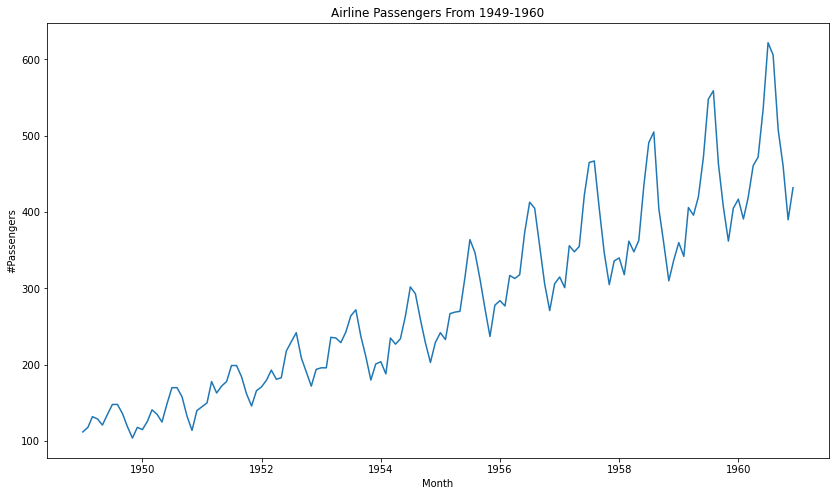

In [4]:
fig = plt.figure(figsize=(14,8))
sns.lineplot(x = data.index, y = data['#Passengers'])
plt.title('Airline Passengers From 1949-1960')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(data)
output = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in results[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [6]:
log_transformed = np.log(data)

results = adfuller(log_transformed)
output = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in results[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
results = adfuller(log_transformed.diff().dropna())
output = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in results[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


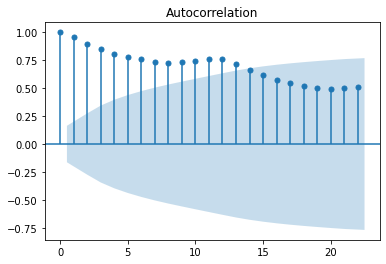

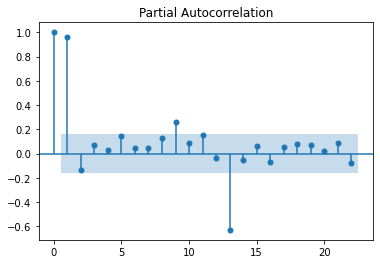

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(log_transformed)
plt.show()
plot_pacf(log_transformed)
plt.show()

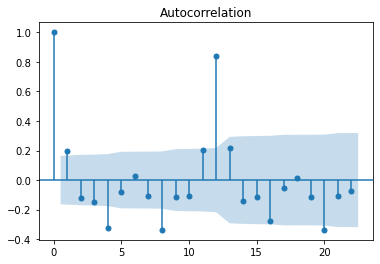

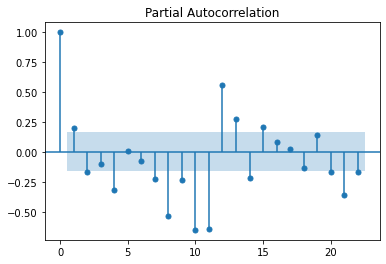

In [9]:
plot_acf(log_transformed.diff().dropna())
plt.show()
plot_pacf(log_transformed.diff().dropna())
plt.show()

In [10]:
log_train = log_transformed[:-12]
log_test = log_transformed[-12:]

/Users/rlathbury/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rlathbury/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA an

RMSE: 0.08483435120947276


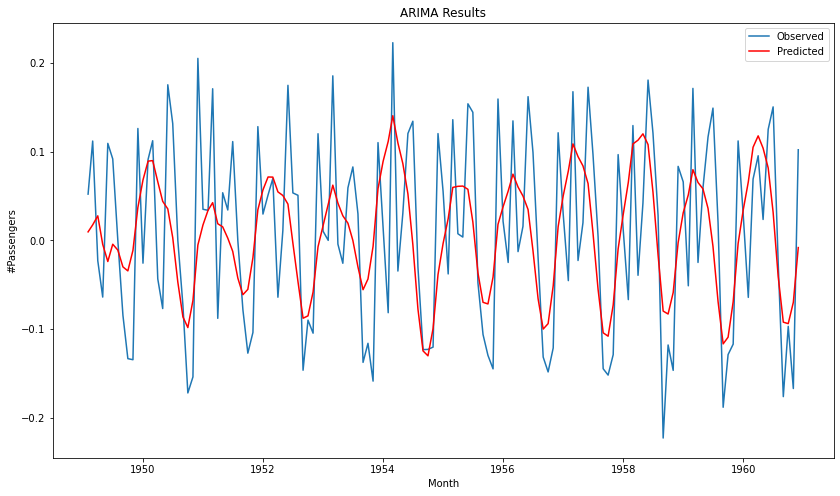

In [71]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


model = ARIMA(log_transformed, order=(2,1,2), freq='MS')
results = model.fit()
rmse = np.sqrt(mean_squared_error(log_transformed.diff().dropna(), results.fittedvalues))

print('RMSE:', rmse)
sns.lineplot(x = log_transformed.diff().dropna().index,
             y = log_transformed.diff().dropna()['#Passengers'],
             label='Observed')
sns.lineplot(x = results.fittedvalues.index,
             y = results.fittedvalues,
             color='red',
             label='Predicted')
plt.title('ARIMA Results')
plt.show()

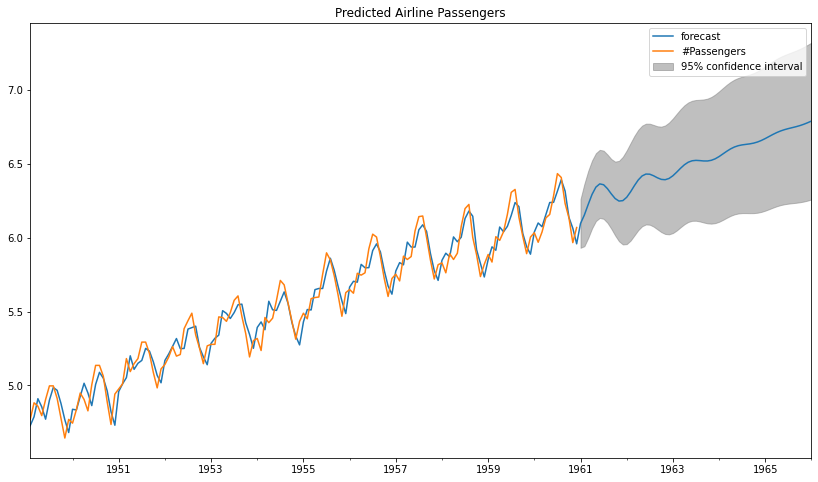

In [83]:
results.plot_predict(1,204)
plt.title('Predicted Airline Passengers')
plt.show()

In [84]:
predictions = results.forecast(60)

In [86]:
predictions = results.forecast(60)
print(np.exp(predictions[0]))

array([443.87101223, 470.03829317, 504.93504638, 540.45485571,
       567.73069905, 580.32805396, 577.00257467, 561.93876604,
       542.38455666, 525.5666705 , 516.65908258, 518.14325827,
       529.93716679, 549.71678345, 573.36068306, 595.78897948,
       612.33145772, 620.24242164, 619.59542556, 613.03665085,
       604.59657398, 598.26635961, 596.94847057, 601.96243377,
       612.98284301, 628.25999697, 645.07999443, 660.46212972,
       671.98839235, 678.50386435, 680.39642888, 679.34133608,
       677.65962151, 677.58621132, 680.69828448, 687.61119975,
       697.93687269, 710.46204225, 723.50177918, 735.36375325,
       744.81250123, 751.39211118, 755.49842962, 758.18780029,
       760.81234348, 764.62056679, 770.44243393, 778.52282844,
       788.51635935, 799.624629  , 810.8362587 , 821.20999322,
       830.1257052 , 837.43164676, 843.44771166, 848.83395956,
       854.37743102, 860.7686472 , 868.42972996, 877.43079846])